In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Input\\train_new.csv")
df.head(2)

C:\Users\Ajay.N.lv\AppData\Local\Temp\ipykernel_31416\1682447456.py:1: DtypeWarning: Columns (34) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Input\\train_new.csv")


,USER_ID,FIRST_MARKETPLACE_ORDER_AT,AY1B,LIFETIME_MKTP_ORDERS,MKTP_ORDERS_365,CATEGORY,EMAIL_DOMAIN,DOMAIN_GOV,DOMAIN_EDU,DOMAIN_ORG,...,FS_MARKETING_CHANNEL,FS_CATEGORY,CONVERTING_VISIT,CONVERTING_SESSION_NUMBER,CS_PLATFORM,CS_WEB_LANDING,CS_UTM_MEDIUM,CS_UTM_SOURCE,CS_MARKETING_CHANNEL,CS_CATEGORY
0,686301,2019-07-03 17:08:50.956,224.38,1,1,one and done,bmhcc.org,False,False,True,...,Paid Search,marketplace_landing,2019-07-03T16:59:39.946Z,1,Desktop,Brand,cpc,google,Paid Search,marketplace_landing
1,686336,2019-07-03 17:44:56.982,306.71,8,1,middle,medtronic.com,False,False,False,...,Paid Search,marketplace_landing,2019-07-03T17:21:04.000Z,3,Desktop,Checkout,internal,direct,Internal Traffic,marketplace_landing


In [3]:
df.shape,df.columns

((213908, 55),
 Index(['USER_ID', 'FIRST_MARKETPLACE_ORDER_AT', 'AY1B', 'LIFETIME_MKTP_ORDERS',
        'MKTP_ORDERS_365', 'CATEGORY', 'EMAIL_DOMAIN', 'DOMAIN_GOV',
        'DOMAIN_EDU', 'DOMAIN_ORG', 'IS_PERSONAL_DOMAIN', 'IS_FORTUNE_500',
        'IS_CLOSED_WON_CORP_DOMAIN', 'FO_ORDER_ID', 'FO_BOOKINGS', 'FO_ORDER',
        'FO_CATERER_ID', 'FO_LEAD_TIME_DAYS', 'FO_SUBMIT_AT_LOCAL',
        'FO_SUBMIT_DOW', 'FO_SUBMIT_WEEKEND', 'FO_SUBMIT_BUS_HOURS',
        'FO_EVENT_AT_LOCAL', 'FO_EVENT_DOW', 'FO_EVENT_WEEKEND',
        'FO_EVENT_BUS_HOURS', 'FO_CATERER_ACCOUNT_MODEL',
        'FO_CATERER_FOOD_TYPE', 'FO_CP_FULFILLED_LAST30',
        'FO_CP_FI_RATE_LAST30', 'FO_ORDER_TYPE',
        'FO_USED_DELIVERY_INSTRUCTIONS', 'FO_RESIDENCE_TYPE', 'FO_ADDRESS_NAME',
        'DELIVERY_ZIP', 'DELIVERY_CITY', 'DELIVERY_STATE', 'FO_HAS_DRINKS',
        'FO_HAS_DESSERT', 'FO_HAS_SPECIAL_INSTRUCTIONS', 'FIRST_VISIT',
        'FS_PLATFORM', 'FS_WEB_LANDING', 'FS_UTM_MEDIUM', 'FS_UTM_SOURCE',
        '

In [4]:
df.dtypes

USER_ID                            int64
FIRST_MARKETPLACE_ORDER_AT        object
AY1B                             float64
LIFETIME_MKTP_ORDERS               int64
MKTP_ORDERS_365                    int64
CATEGORY                          object
EMAIL_DOMAIN                      object
DOMAIN_GOV                          bool
DOMAIN_EDU                          bool
DOMAIN_ORG                          bool
IS_PERSONAL_DOMAIN                  bool
IS_FORTUNE_500                      bool
IS_CLOSED_WON_CORP_DOMAIN           bool
FO_ORDER_ID                        int64
FO_BOOKINGS                      float64
FO_ORDER                            bool
FO_CATERER_ID                      int64
FO_LEAD_TIME_DAYS                  int64
FO_SUBMIT_AT_LOCAL                object
FO_SUBMIT_DOW                      int64
FO_SUBMIT_WEEKEND                   bool
FO_SUBMIT_BUS_HOURS                 bool
FO_EVENT_AT_LOCAL                 object
FO_EVENT_DOW                       int64
FO_EVENT_WEEKEND

In [5]:
cols2=['FO_BOOKINGS','AY1B']
df[cols2].head()

,FO_BOOKINGS,AY1B
0,224.38,224.38
1,306.71,306.71
2,119.99,119.99
3,185.97,185.97
4,481.76,481.76


In [6]:
def column_dtype(type_):
    return list(df.select_dtypes(include=[str(type_)]).columns)

In [7]:
df.dtypes.unique()

array([dtype('int64'), dtype('O'), dtype('float64'), dtype('bool')],
      dtype=object)

In [8]:
initial_numeric_columns = column_dtype('number')
initial_numeric_columns

['USER_ID',
 'AY1B',
 'LIFETIME_MKTP_ORDERS',
 'MKTP_ORDERS_365',
 'FO_ORDER_ID',
 'FO_BOOKINGS',
 'FO_CATERER_ID',
 'FO_LEAD_TIME_DAYS',
 'FO_SUBMIT_DOW',
 'FO_EVENT_DOW',
 'FO_CP_FULFILLED_LAST30',
 'FO_CP_FI_RATE_LAST30',
 'CONVERTING_SESSION_NUMBER']

In [9]:
initial_numeric_columns

['USER_ID',
 'AY1B',
 'LIFETIME_MKTP_ORDERS',
 'MKTP_ORDERS_365',
 'FO_ORDER_ID',
 'FO_BOOKINGS',
 'FO_CATERER_ID',
 'FO_LEAD_TIME_DAYS',
 'FO_SUBMIT_DOW',
 'FO_EVENT_DOW',
 'FO_CP_FULFILLED_LAST30',
 'FO_CP_FI_RATE_LAST30',
 'CONVERTING_SESSION_NUMBER']

In [10]:
cat_cols = column_dtype('object')
num_cols = column_dtype('number')
bool_cols = column_dtype('boolean')
print(f"Total columns = {len(df.columns)} \nCategorical columns = {len(cat_cols)} \nnumeric_columns={len(num_cols)} \nBoolean columns = {len(bool_cols)}")

Total columns = 55 
Categorical columns = 27 
numeric_columns=13 
Boolean columns = 15


In [11]:
28+13+15

56

In [12]:
#Convert datetime time columns which are Categorical to DateTime Format

def iso_date_time_conversion(df: pd.DataFrame, columns: list):
    from datetime import datetime

    for col in columns:
        df[col] = df[col].str[:-1]
        df[col] = df[col].apply(lambda x : datetime.fromisoformat(x))
    return df


In [13]:
datetime_columns = ['FIRST_MARKETPLACE_ORDER_AT','FO_EVENT_AT_LOCAL','CONVERTING_VISIT','FIRST_VISIT','FO_SUBMIT_AT_LOCAL']
df[datetime_columns].head()

,FIRST_MARKETPLACE_ORDER_AT,FO_EVENT_AT_LOCAL,CONVERTING_VISIT,FIRST_VISIT,FO_SUBMIT_AT_LOCAL
0,2019-07-03 17:08:50.956,2019-07-15T11:15:00.000Z,2019-07-03T16:59:39.946Z,2019-07-03T16:59:39.946Z,2019-07-03T12:08:50.956Z
1,2019-07-03 17:44:56.982,2019-07-10T11:45:00.000Z,2019-07-03T17:21:04.000Z,2019-07-02T14:52:58.086Z,2019-07-03T10:44:56.982Z
2,2019-07-03 17:19:10.419,2019-07-06T14:00:00.000Z,2019-07-03T17:12:50.578Z,2019-07-03T17:12:50.578Z,2019-07-03T13:19:10.419Z
3,2019-07-03 18:39:47.875,2019-07-15T12:15:00.000Z,2019-07-03T18:28:18.000Z,2019-07-03T13:10:09.000Z,2019-07-03T14:39:47.875Z
4,2019-07-03 18:52:36.301,2019-07-09T11:45:00.000Z,2019-07-03T18:43:07.934Z,2019-07-03T18:43:07.934Z,2019-07-03T14:52:36.301Z


In [14]:
df = iso_date_time_conversion(df,datetime_columns)
df[datetime_columns].dtypes

FIRST_MARKETPLACE_ORDER_AT    datetime64[ns]
FO_EVENT_AT_LOCAL             datetime64[ns]
CONVERTING_VISIT              datetime64[ns]
FIRST_VISIT                   datetime64[ns]
FO_SUBMIT_AT_LOCAL            datetime64[ns]
dtype: object

In [15]:
df.head(1)

,USER_ID,FIRST_MARKETPLACE_ORDER_AT,AY1B,LIFETIME_MKTP_ORDERS,MKTP_ORDERS_365,CATEGORY,EMAIL_DOMAIN,DOMAIN_GOV,DOMAIN_EDU,DOMAIN_ORG,...,FS_MARKETING_CHANNEL,FS_CATEGORY,CONVERTING_VISIT,CONVERTING_SESSION_NUMBER,CS_PLATFORM,CS_WEB_LANDING,CS_UTM_MEDIUM,CS_UTM_SOURCE,CS_MARKETING_CHANNEL,CS_CATEGORY
0,686301,2019-07-03 17:08:50.950,224.38,1,1,one and done,bmhcc.org,False,False,True,...,Paid Search,marketplace_landing,2019-07-03 16:59:39.946,1,Desktop,Brand,cpc,google,Paid Search,marketplace_landing


Based on requirements columns [LIFETIME_MKTP_ORDERS,MKTP_ORDERS_365,CATEGORY] MUST Be ignored as input features as it will not be available during the time of first user's order interaction

In [16]:
cols_to_be_dropped = ["LIFETIME_MKTP_ORDERS","MKTP_ORDERS_365","CATEGORY"]
df.drop(columns=cols_to_be_dropped,inplace=True)

In [17]:
x=df["EMAIL_DOMAIN"].str[-3:]                       # Can be converted into most,less,no common cols

cols_available = ["gov","org","edu"]

x_ct = dict(pd.Series(x).value_counts())

for key,value in x_ct.items():
    if key in cols_available:
        print(key,value)

org 14020
edu 7919
gov 705


In [18]:
df.dtypes.unique()

array([dtype('int64'), dtype('<M8[ns]'), dtype('float64'), dtype('O'),
       dtype('bool')], dtype=object)

In [19]:
def column_dtype_tracker():
    cat_cols = column_dtype('object')
    num_cols = column_dtype('number')
    bool_cols = column_dtype('boolean')
    date_time_cols = column_dtype('datetime')

    print(f"Total columns = {len(df.columns)} \nCategorical columns = {len(cat_cols)} \nnumeric_columns={len(num_cols)} \nBoolean columns = {len(bool_cols)} \nDate time columns = {len(date_time_cols)}")

In [20]:
column_dtype_tracker()

Total columns = 52 
Categorical columns = 21 
numeric_columns=11 
Boolean columns = 15 
Date time columns = 5


Numeric columns

In [21]:
df[column_dtype('number')].head(2)

,USER_ID,AY1B,FO_ORDER_ID,FO_BOOKINGS,FO_CATERER_ID,FO_LEAD_TIME_DAYS,FO_SUBMIT_DOW,FO_EVENT_DOW,FO_CP_FULFILLED_LAST30,FO_CP_FI_RATE_LAST30,CONVERTING_SESSION_NUMBER
0,686301,224.38,99141621,224.38,8037,12,3,1,24,0.041667,1
1,686336,306.71,99130786,306.71,203810,7,3,3,1,0.000000,3


In [22]:
df["FO_CATERER_ID"].nunique(),df["FO_ORDER_ID"].nunique(),df['USER_ID'].nunique()

(42936, 213908, 213908)

In [23]:
col_ids = ["FO_CATERER_ID", "FO_ORDER_ID", "USER_ID"]

df.drop(columns = col_ids,inplace=True)

In [24]:
num_cols = column_dtype('number')

In [25]:
df[num_cols].isnull().sum()    

#There are nulls in FO_CP_FI_RATE_LAST30 (This field shows the Fulfillment Issue (FI) rate for the
#Catering Partner associated with this first order in the 30 days prior to this specific first order)

AY1B                             0
FO_BOOKINGS                      0
FO_LEAD_TIME_DAYS                0
FO_SUBMIT_DOW                    0
FO_EVENT_DOW                     0
FO_CP_FULFILLED_LAST30           0
FO_CP_FI_RATE_LAST30         19042
CONVERTING_SESSION_NUMBER        0
dtype: int64

In [26]:
df[num_cols].duplicated().sum()

397

In [27]:
df["FO_CP_FI_RATE_LAST30"].min(),df["FO_CP_FI_RATE_LAST30"].max()

(0.0, 1.0)

In [28]:
df[["FO_CP_FULFILLED_LAST30","FO_CP_FI_RATE_LAST30"]].head(20)

,FO_CP_FULFILLED_LAST30,FO_CP_FI_RATE_LAST30
0,24,0.041667
1,1,0.000000
2,4,0.000000
3,0,NaN
4,11,0.000000
5,3,0.000000
6,4,0.000000
7,0,NaN
8,17,0.000000
9,1,0.000000


In [29]:
df[["FO_CP_FULFILLED_LAST30","FO_CP_FI_RATE_LAST30"]][df["FO_CP_FI_RATE_LAST30"].isna()]

,FO_CP_FULFILLED_LAST30,FO_CP_FI_RATE_LAST30
3,0,NaN
7,0,NaN
54,0,NaN
63,0,NaN
64,0,NaN
...,...,...
213852,0,NaN
213853,0,NaN
213883,0,NaN
213886,0,NaN


In [30]:
df["FO_CP_FI_RATE_LAST30"].fillna(df["FO_CP_FI_RATE_LAST30"].mean(),inplace=True)
df[num_cols].isnull().sum() 

AY1B                         0
FO_BOOKINGS                  0
FO_LEAD_TIME_DAYS            0
FO_SUBMIT_DOW                0
FO_EVENT_DOW                 0
FO_CP_FULFILLED_LAST30       0
FO_CP_FI_RATE_LAST30         0
CONVERTING_SESSION_NUMBER    0
dtype: int64

Encoding boolean columns

In [31]:
df[bool_cols].head()

,DOMAIN_GOV,DOMAIN_EDU,DOMAIN_ORG,IS_PERSONAL_DOMAIN,IS_FORTUNE_500,IS_CLOSED_WON_CORP_DOMAIN,FO_ORDER,FO_SUBMIT_WEEKEND,FO_SUBMIT_BUS_HOURS,FO_EVENT_WEEKEND,FO_EVENT_BUS_HOURS,FO_USED_DELIVERY_INSTRUCTIONS,FO_HAS_DRINKS,FO_HAS_DESSERT,FO_HAS_SPECIAL_INSTRUCTIONS
0,False,False,True,False,False,False,False,False,True,False,True,True,False,False,False
1,False,False,False,False,False,False,False,False,True,False,True,True,True,True,False
2,False,False,False,True,False,False,True,False,True,True,False,False,False,False,False
3,False,False,False,True,False,False,True,False,True,False,True,False,True,True,False
4,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False


In [32]:
initial_boolean_columns = column_dtype('boolean')
initial_boolean_columns

['DOMAIN_GOV',
 'DOMAIN_EDU',
 'DOMAIN_ORG',
 'IS_PERSONAL_DOMAIN',
 'IS_FORTUNE_500',
 'IS_CLOSED_WON_CORP_DOMAIN',
 'FO_ORDER',
 'FO_SUBMIT_WEEKEND',
 'FO_SUBMIT_BUS_HOURS',
 'FO_EVENT_WEEKEND',
 'FO_EVENT_BUS_HOURS',
 'FO_USED_DELIVERY_INSTRUCTIONS',
 'FO_HAS_DRINKS',
 'FO_HAS_DESSERT',
 'FO_HAS_SPECIAL_INSTRUCTIONS']

In [33]:
# let's convert true :1 false :0

for col in bool_cols:
    df[col]=df[col].apply(lambda x : 1 if x==True else 0)

df[bool_cols].head()

,DOMAIN_GOV,DOMAIN_EDU,DOMAIN_ORG,IS_PERSONAL_DOMAIN,IS_FORTUNE_500,IS_CLOSED_WON_CORP_DOMAIN,FO_ORDER,FO_SUBMIT_WEEKEND,FO_SUBMIT_BUS_HOURS,FO_EVENT_WEEKEND,FO_EVENT_BUS_HOURS,FO_USED_DELIVERY_INSTRUCTIONS,FO_HAS_DRINKS,FO_HAS_DESSERT,FO_HAS_SPECIAL_INSTRUCTIONS
0,0,0,1,0,0,0,0,0,1,0,1,1,0,0,0
1,0,0,0,0,0,0,0,0,1,0,1,1,1,1,0
2,0,0,0,1,0,0,1,0,1,1,0,0,0,0,0
3,0,0,0,1,0,0,1,0,1,0,1,0,1,1,0
4,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0


In [34]:
column_dtype_tracker()

Total columns = 49 
Categorical columns = 21 
numeric_columns=23 
Boolean columns = 0 
Date time columns = 5


In [35]:
df[bool_cols+["AY1B"]].corr()["AY1B"].drop("AY1B").sort_values(ascending=False)

IS_CLOSED_WON_CORP_DOMAIN        0.100424
FO_USED_DELIVERY_INSTRUCTIONS    0.072109
IS_FORTUNE_500                   0.061776
FO_EVENT_BUS_HOURS               0.057212
FO_SUBMIT_BUS_HOURS              0.029112
FO_HAS_DESSERT                   0.021882
FO_HAS_DRINKS                    0.020729
FO_HAS_SPECIAL_INSTRUCTIONS      0.013137
DOMAIN_EDU                       0.002831
DOMAIN_GOV                      -0.003335
DOMAIN_ORG                      -0.013390
FO_SUBMIT_WEEKEND               -0.023456
FO_EVENT_WEEKEND                -0.070256
IS_PERSONAL_DOMAIN              -0.090532
FO_ORDER                        -0.091180
Name: AY1B, dtype: float64

Categorical Columns

In [36]:
cat_cols=column_dtype('object')
df[cat_cols].head(10)

,EMAIL_DOMAIN,FO_CATERER_ACCOUNT_MODEL,FO_CATERER_FOOD_TYPE,FO_ORDER_TYPE,FO_RESIDENCE_TYPE,FO_ADDRESS_NAME,DELIVERY_ZIP,DELIVERY_CITY,DELIVERY_STATE,FS_PLATFORM,...,FS_UTM_MEDIUM,FS_UTM_SOURCE,FS_MARKETING_CHANNEL,FS_CATEGORY,CS_PLATFORM,CS_WEB_LANDING,CS_UTM_MEDIUM,CS_UTM_SOURCE,CS_MARKETING_CHANNEL,CS_CATEGORY
0,bmhcc.org,Enterprise,Hot Catering,delivery,business,Baptist Memorial Health Care Corporate Office,38120,Memphis,TN,Desktop,...,cpc,google,Paid Search,marketplace_landing,Desktop,Brand,cpc,google,Paid Search,marketplace_landing
1,medtronic.com,Enterprise,Vegetarian Friendly,third_party_delivery,business,UCSD-Center for the Furture of Surgery - MET B...,92093,San Diego,CA,Desktop,...,cpc,google,Paid Search,marketplace_landing,Desktop,Checkout,internal,direct,Internal Traffic,marketplace_landing
2,outlook.com,Enterprise,Vegetarian Friendly,takeout,residential,NaN,19335,Downingtown,PA,Desktop,...,cpc,google,Paid Search,marketplace_landing,Desktop,Brand,cpc,google,Paid Search,marketplace_landing
3,yahoo.com,Chain,BBQ,delivery,business,Dr Enoch & Lamei,30062,Marietta,GA,Tablet,...,organic,google,Organic Search,marketplace_landing,Tablet,Home,cpc,google,Paid Search,marketplace_landing
4,leebcor.com,Enterprise,Hot Catering,delivery,business,"Leebcor Services, LLC",23185,Williamsburg,VA,Desktop,...,cpc,google,Paid Search,marketplace_landing,Desktop,Brand,cpc,google,Paid Search,marketplace_landing
5,worldstage.com,Independent,Italian,delivery,business,WorldStage,07094,Secaucus,NJ,Desktop,...,cpc,google,Paid Search,marketplace_landing,Desktop,Home,internal,direct,Internal Traffic,marketplace_landing
6,its.jnj.com,Enterprise,Hot Catering,delivery,business,Phenix City Spine + Joint Center,36867,Phenix City,AL,Tablet,...,cpc,google,Paid Search,marketplace_landing,Tablet,Home,cpc,google,Paid Search,marketplace_landing
7,gmail.com,Chain,Vegetarian Friendly,delivery,residential,Weiser Home,33437,Boynton Beach,FL,Tablet,...,cpc,google,Paid Search,marketplace_landing,Desktop,Caterer,email,direct,Email,marketplace_landing
8,yahoo.com,NaN,American,delivery,residential,Residential Candace Sorrentino,37207,Nashville,TN,Mobile,...,cpc,google,Paid Search,marketplace_landing,Mobile,Checkout,internal,direct,Internal Traffic,marketplace_landing
9,aol.com,Enterprise,Chinese,delivery,business,North Atlanta Primary Care,30024,Suwanee,GA,Desktop,...,private_store,barberitos,Other,ezo_landing,Desktop,Home,cpc,google,Paid Search,marketplace_landing


In [37]:
one_hot_encoding_cols = []
categorical_encoding_cols = []
for col in cat_cols:
    ct = df[col].nunique()
    print(f"{col} = {df[col].nunique()}")
    if ct<5:
        one_hot_encoding_cols.append(col)
    elif ct<99:
 
        categorical_encoding_cols.append(col)
    else:
        continue
print("one-hot:",one_hot_encoding_cols,"\n","Categorical",categorical_encoding_cols)
others = [i for i in cat_cols if i not in one_hot_encoding_cols + categorical_encoding_cols]
print("others",others)

print("Total:",len(cat_cols))
print("One-hot:",len(one_hot_encoding_cols))
print("categorical-encoding:",len(categorical_encoding_cols))


EMAIL_DOMAIN = 66327
FO_CATERER_ACCOUNT_MODEL = 3
FO_CATERER_FOOD_TYPE = 53
FO_ORDER_TYPE = 3
FO_RESIDENCE_TYPE = 2
FO_ADDRESS_NAME = 132272
DELIVERY_ZIP = 13294
DELIVERY_CITY = 6341
DELIVERY_STATE = 51
FS_PLATFORM = 4
FS_WEB_LANDING = 20
FS_UTM_MEDIUM = 39
FS_UTM_SOURCE = 2938
FS_MARKETING_CHANNEL = 13
FS_CATEGORY = 4
CS_PLATFORM = 4
CS_WEB_LANDING = 19
CS_UTM_MEDIUM = 32
CS_UTM_SOURCE = 899
CS_MARKETING_CHANNEL = 12
CS_CATEGORY = 4
one-hot: ['FO_CATERER_ACCOUNT_MODEL', 'FO_ORDER_TYPE', 'FO_RESIDENCE_TYPE', 'FS_PLATFORM', 'FS_CATEGORY', 'CS_PLATFORM', 'CS_CATEGORY'] 
 Categorical ['FO_CATERER_FOOD_TYPE', 'DELIVERY_STATE', 'FS_WEB_LANDING', 'FS_UTM_MEDIUM', 'FS_MARKETING_CHANNEL', 'CS_WEB_LANDING', 'CS_UTM_MEDIUM', 'CS_MARKETING_CHANNEL']
others ['EMAIL_DOMAIN', 'FO_ADDRESS_NAME', 'DELIVERY_ZIP', 'DELIVERY_CITY', 'FS_UTM_SOURCE', 'CS_UTM_SOURCE']
Total: 21
One-hot: 7
categorical-encoding: 8


In [38]:
one_hot_encoding_cols

['FO_CATERER_ACCOUNT_MODEL',
 'FO_ORDER_TYPE',
 'FO_RESIDENCE_TYPE',
 'FS_PLATFORM',
 'FS_CATEGORY',
 'CS_PLATFORM',
 'CS_CATEGORY']

In [39]:
df.shape

(213908, 49)

In [40]:
df = pd.get_dummies(df,columns=one_hot_encoding_cols)
df.shape

(213908, 66)

In [41]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

for col in categorical_encoding_cols:
    df[col]=label_encoder.fit_transform(df[col])

df[categorical_encoding_cols].head()

,FO_CATERER_FOOD_TYPE,DELIVERY_STATE,FS_WEB_LANDING,FS_UTM_MEDIUM,FS_MARKETING_CHANNEL,CS_WEB_LANDING,CS_UTM_MEDIUM,CS_MARKETING_CHANNEL
0,27,42,2,8,9,2,9,9
1,51,4,2,8,9,6,17,6
2,51,38,2,8,9,2,9,9
3,3,10,13,22,6,12,9,9
4,27,45,2,8,9,2,9,9


In [42]:
others

['EMAIL_DOMAIN',
 'FO_ADDRESS_NAME',
 'DELIVERY_ZIP',
 'DELIVERY_CITY',
 'FS_UTM_SOURCE',
 'CS_UTM_SOURCE']

In [43]:

for i,j in df["CS_UTM_SOURCE"].value_counts().items():
    print(i,"=",j)

google = 150157
direct = 59477
bing = 892
refer_a_friend = 427
iterable = 287
ezcater = 228
subway = 142
hs_email = 121
hs_automation = 89
honeybaked = 78
carrabbas = 69
store_caterer = 51
retailmenot = 37
modify_order = 37
android = 36
yahoo = 30
office = 26
chrome = 25
famousdaves = 23
ezo = 20
phillypretzelfactory = 20
metrodiner = 20
fuzzystacoshop = 16
offers = 16
eatpdq = 15
lepainquotidien = 14
email = 14
barberitos = 13
join ezcater customer = 13
manhattanbagel = 13
dinosaurbarbque = 13
facebook = 13
luellasbbq = 13
costavida = 12
impact = 11
tropicalsmoothiecafe = 11
auntieannes = 11
krispykreme = 11
bobevans = 11
smokeybones = 11
duckduckgo = 10
saladworks = 9
enterprise = 9
urbancookhouse = 9
okta = 8
4rsmokehouse = 8
ihop = 8
outback = 8
bennystacos = 8
bonefishgrill = 8
peiwei = 8
elfenix = 8
everafterguide = 8
condadotacos = 8
burger21 = 7
thehalalguys = 7
anotherbrokenegg = 7
littlegreekfreshgrill = 7
randrbbq = 7
cowboychicken = 7
abuelos = 7
redlobster = 7
pwc = 6
join

In [44]:
frequency_map = df["CS_UTM_SOURCE"].value_counts(normalize=True)
df["CS_UTM_SOURCE"] = df["CS_UTM_SOURCE"].map(frequency_map)
df["CS_UTM_SOURCE"].head()

0    0.701973
1    0.278051
2    0.701973
3    0.701973
4    0.701973
Name: CS_UTM_SOURCE, dtype: float64

In [45]:
for i in others:
    print(f"{i}:{df[i].nunique()}")   

EMAIL_DOMAIN:66327
FO_ADDRESS_NAME:132272
DELIVERY_ZIP:13294
DELIVERY_CITY:6341
FS_UTM_SOURCE:2938
CS_UTM_SOURCE:35


In [46]:
temp=df["FS_UTM_SOURCE"].value_counts()
lgth = len(temp)/3  # Splitting this column into three section frequency- High,mid,low
ct=0
for i,j in temp.items():
  
    if j<10:
        ct+=1
        print(i,"=",j)
print("ct",ct)
print(len(temp))

saltgrass = 9
portagebaycafe = 9
thelittlebeet = 9
wixsite = 9
guaposrestaurant = 9
wabagrill = 9
henrisbakery = 9
portlandcateringcompany = 9
mediterraneangrill = 9
spitzrestaurant = 9
pizzaranch = 9
dinosaurbarbque = 9
isabellascatering = 9
sweet-dreams-bakery = 9
sweetleafcafe = 9
kanelabreakfastclub = 9
thetacojoint = 9
miapalatincafe = 9
onetaco = 9
primohoagies = 9
cinnabon = 9
vitosdeli = 8
epeppercorns = 8
angelinabakery = 8
nalleyfresh = 8
swineandsons = 8
goldbergsfinefoods = 8
lepeepindy = 8
ricekitchen = 8
eatwellnashville = 8
ehsandwich = 8
blvdcafecatering = 8
catchannel = 8
desanopizza = 8
lunchtimeglobal = 8
fruttabowls = 8
solmexicangrilldc = 8
corelifeeatery = 8
luciusq = 8
mailchi = 8
gtpie = 8
eatpitapita = 8
cateringseattle = 8
crackshack = 8
swigandswinebbq = 8
grubkitchenandbar = 8
picapica = 8
paprikacater = 8
join ezcater customer = 8
rudyssmokehouse = 8
mainandmarket = 8
bagelcafe = 8
azsandwich = 8
chronictacos = 8
breadzeppelin = 8
goldenkrust = 8
peacelovea

In [47]:
data = temp.values
temp=df["FS_UTM_SOURCE"].value_counts()

q1 = np.percentile(data, 25)
q3 = np.percentile(data, 80)

new_map = {}

for key,val in temp.items():
    if val<q1:
        new_map[key]="Low"
    elif val<q3:
        new_map[key]="Medium"
    else:
        new_map[key]="High"
df["FS_UTM_SOURCE_frequency"] = df["FS_UTM_SOURCE"].map(new_map)

In [48]:
df["FS_UTM_SOURCE_frequency"].head()

0    High
1    High
2    High
3    High
4    High
Name: FS_UTM_SOURCE_frequency, dtype: object

In [49]:
df.drop(columns=['EMAIL_DOMAIN',
 'FO_ADDRESS_NAME',
 'DELIVERY_ZIP',
 'DELIVERY_CITY',
 'FS_UTM_SOURCE'],inplace=True)

In [50]:
column_dtype_tracker()

Total columns = 62 
Categorical columns = 1 
numeric_columns=32 
Boolean columns = 24 
Date time columns = 5


In [51]:
df.select_dtypes('object')

,FS_UTM_SOURCE_frequency
0,High
1,High
2,High
3,High
4,High
...,...
213903,High
213904,High
213905,High
213906,High


In [52]:
bool_cols = df.select_dtypes('bool')
for col in bool_cols:
    df[col]=df[col].apply(lambda x : 1 if x==True else 0)


In [53]:
df["FS_UTM_SOURCE_frequency"]=label_encoder.fit_transform(df["FS_UTM_SOURCE_frequency"])

In [54]:
column_dtype_tracker()

Total columns = 62 
Categorical columns = 0 
numeric_columns=57 
Boolean columns = 0 
Date time columns = 5


In [55]:
df.head()

,FIRST_MARKETPLACE_ORDER_AT,AY1B,DOMAIN_GOV,DOMAIN_EDU,DOMAIN_ORG,IS_PERSONAL_DOMAIN,IS_FORTUNE_500,IS_CLOSED_WON_CORP_DOMAIN,FO_BOOKINGS,FO_ORDER,...,FS_CATEGORY_other_landing,CS_PLATFORM_Desktop,CS_PLATFORM_Mobile,CS_PLATFORM_Other,CS_PLATFORM_Tablet,CS_CATEGORY_ezmanage_landing,CS_CATEGORY_ezo_landing,CS_CATEGORY_marketplace_landing,CS_CATEGORY_other_landing,FS_UTM_SOURCE_frequency
0,2019-07-03 17:08:50.950,224.38,0,0,1,0,0,0,224.38,0,...,0,1,0,0,0,0,0,1,0,0
1,2019-07-03 17:44:56.980,306.71,0,0,0,0,0,0,306.71,0,...,0,1,0,0,0,0,0,1,0,0
2,2019-07-03 17:19:10.410,119.99,0,0,0,1,0,0,119.99,1,...,0,1,0,0,0,0,0,1,0,0
3,2019-07-03 18:39:47.870,185.97,0,0,0,1,0,0,185.97,1,...,0,0,0,0,1,0,0,1,0,0
4,2019-07-03 18:52:36.300,481.76,0,0,0,0,0,0,481.76,0,...,0,1,0,0,0,0,0,1,0,0


Starting Regression

In [56]:
from sklearn import preprocessing,svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import  KNeighborsRegressor


from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [57]:
df.head()

,FIRST_MARKETPLACE_ORDER_AT,AY1B,DOMAIN_GOV,DOMAIN_EDU,DOMAIN_ORG,IS_PERSONAL_DOMAIN,IS_FORTUNE_500,IS_CLOSED_WON_CORP_DOMAIN,FO_BOOKINGS,FO_ORDER,...,FS_CATEGORY_other_landing,CS_PLATFORM_Desktop,CS_PLATFORM_Mobile,CS_PLATFORM_Other,CS_PLATFORM_Tablet,CS_CATEGORY_ezmanage_landing,CS_CATEGORY_ezo_landing,CS_CATEGORY_marketplace_landing,CS_CATEGORY_other_landing,FS_UTM_SOURCE_frequency
0,2019-07-03 17:08:50.950,224.38,0,0,1,0,0,0,224.38,0,...,0,1,0,0,0,0,0,1,0,0
1,2019-07-03 17:44:56.980,306.71,0,0,0,0,0,0,306.71,0,...,0,1,0,0,0,0,0,1,0,0
2,2019-07-03 17:19:10.410,119.99,0,0,0,1,0,0,119.99,1,...,0,1,0,0,0,0,0,1,0,0
3,2019-07-03 18:39:47.870,185.97,0,0,0,1,0,0,185.97,1,...,0,0,0,0,1,0,0,1,0,0
4,2019-07-03 18:52:36.300,481.76,0,0,0,0,0,0,481.76,0,...,0,1,0,0,0,0,0,1,0,0


In [58]:
# for i in num_cols: 
#   sns.boxplot(df[i])
#   plt.title(i)
#   plt.show()

Skew


In [59]:
num_cols

['AY1B',
 'FO_BOOKINGS',
 'FO_LEAD_TIME_DAYS',
 'FO_SUBMIT_DOW',
 'FO_EVENT_DOW',
 'FO_CP_FULFILLED_LAST30',
 'FO_CP_FI_RATE_LAST30',
 'CONVERTING_SESSION_NUMBER']

In [60]:
# for i in num_cols:
#     sns.displot(df[i], kde=True)
#     plt.xlabel(f'Variable')
#     plt.ylabel('Density')
#     plt.title(i)
#     plt.show()

In [61]:
# The target variable and some of the numerical features are right-skewed
# Using log-transformation

skewed_cols = ["CONVERTING_SESSION_NUMBER", "FO_CP_FI_RATE_LAST30", "FO_CP_FULFILLED_LAST30", "FO_LEAD_TIME_DAYS"]
skew_with_neg = ["AY1B","FO_BOOKINGS"]
df[skewed_cols]

,CONVERTING_SESSION_NUMBER,FO_CP_FI_RATE_LAST30,FO_CP_FULFILLED_LAST30,FO_LEAD_TIME_DAYS
0,1,0.041667,24,12
1,3,0.000000,1,7
2,1,0.000000,4,3
3,3,0.059774,0,12
4,1,0.000000,11,6
...,...,...,...,...
213903,1,0.000000,2,0
213904,10,0.125000,16,1
213905,1,0.000000,1,0
213906,1,0.000000,20,1


In [62]:
for col in skewed_cols:
    print(f"{col} = {df[col].min()}, {df[col].max()}")

CONVERTING_SESSION_NUMBER = 1, 4738
FO_CP_FI_RATE_LAST30 = 0.0, 1.0
FO_CP_FULFILLED_LAST30 = 0, 432
FO_LEAD_TIME_DAYS = -4, 398


In [63]:
#assuming that const for FO_LEAD_TIME_DAYS is -20

df["FO_LEAD_TIME_DAYS"] = df["FO_LEAD_TIME_DAYS"]+20


In [64]:
for col in skewed_cols:
    print(f"{col} = {df[col].min()}, {df[col].max()}")

CONVERTING_SESSION_NUMBER = 1, 4738
FO_CP_FI_RATE_LAST30 = 0.0, 1.0
FO_CP_FULFILLED_LAST30 = 0, 432
FO_LEAD_TIME_DAYS = 16, 418


In [65]:
# def helper(x):
#     if x < 0:
#         return 1
#     return x 

# # Apply the helper function to the "FO_LEAD_TIME_DAYS" column
# df["FO_LEAD_TIME_DAYS"] = df["FO_LEAD_TIME_DAYS"].apply(helper)
# df["FO_BOOKINGS"] = df["FO_BOOKINGS"].apply(helper)
# df["AY1B"] = df["AY1B"].apply(helper)

In [66]:
for col in skewed_cols:                      #log-transformation
    df[col] = np.log1p(df[col])
    

In [67]:
from sklearn.preprocessing import PowerTransformer


pt = PowerTransformer(method='yeo-johnson')
transformed_data = pt.fit_transform(df[['FO_BOOKINGS']])
transformed_data_target = pt.fit_transform(df[['AY1B']])

# Store transformed data in DataFrame
df['FO_BOOKINGS'] = transformed_data
df['AY1B'] = transformed_data_target


In [68]:
# for i in num_cols:
#     sns.displot(df[i], kde=True)
#     plt.xlabel(f'Variable')
#     plt.ylabel('Density')
#     plt.title(i)
#     plt.show()

In [69]:
from scipy.stats import skew

# Calculate skewness
skewness_value = skew(df["AY1B"])
print(f'Skewness: {skewness_value}')

Skewness: -16.306703706288722


In [70]:
for col in num_cols:
    skewness_value = skew(df[col])
    print(f"{col} = {skewness_value}")

AY1B = -16.306703706288722
FO_BOOKINGS = 0.638185321663903
FO_LEAD_TIME_DAYS = 3.153850758398102
FO_SUBMIT_DOW = 0.1627425869242255
FO_EVENT_DOW = -0.1738933410932383
FO_CP_FULFILLED_LAST30 = -0.021883743858134415
FO_CP_FI_RATE_LAST30 = 3.3273583393560715
CONVERTING_SESSION_NUMBER = 1.2253820425593174


In [71]:
# sns.kdeplot(new_target, shade=True)
# plt.xlabel('Target Variable')
# plt.ylabel('Density')
# plt.title('KDE Plot of Target Variable')
# plt.show()

In [72]:
# sns.heatmap(df[x].corr(),annot=True,cmap='coolwarm', fmt=".2f")

In [73]:
for i in initial_numeric_columns:
    try:
        print(f"{i}={df[i].min()},{df[i].max()}")
    except:
        pass

AY1B=-158.15569548118012,29.567208147310062
FO_BOOKINGS=-48.45193510756265,27.932484772984377
FO_LEAD_TIME_DAYS=2.833213344056216,6.037870919922137
FO_SUBMIT_DOW=0,6
FO_EVENT_DOW=0,6
FO_CP_FULFILLED_LAST30=0.0,6.07073772800249
FO_CP_FI_RATE_LAST30=0.0,0.6931471805599453
CONVERTING_SESSION_NUMBER=0.6931471805599453,8.463581421967588


In [74]:
num_cols

['AY1B',
 'FO_BOOKINGS',
 'FO_LEAD_TIME_DAYS',
 'FO_SUBMIT_DOW',
 'FO_EVENT_DOW',
 'FO_CP_FULFILLED_LAST30',
 'FO_CP_FI_RATE_LAST30',
 'CONVERTING_SESSION_NUMBER']

In [75]:
initial_numeric_columns, initial_boolean_columns

(['USER_ID',
  'AY1B',
  'LIFETIME_MKTP_ORDERS',
  'MKTP_ORDERS_365',
  'FO_ORDER_ID',
  'FO_BOOKINGS',
  'FO_CATERER_ID',
  'FO_LEAD_TIME_DAYS',
  'FO_SUBMIT_DOW',
  'FO_EVENT_DOW',
  'FO_CP_FULFILLED_LAST30',
  'FO_CP_FI_RATE_LAST30',
  'CONVERTING_SESSION_NUMBER'],
 ['DOMAIN_GOV',
  'DOMAIN_EDU',
  'DOMAIN_ORG',
  'IS_PERSONAL_DOMAIN',
  'IS_FORTUNE_500',
  'IS_CLOSED_WON_CORP_DOMAIN',
  'FO_ORDER',
  'FO_SUBMIT_WEEKEND',
  'FO_SUBMIT_BUS_HOURS',
  'FO_EVENT_WEEKEND',
  'FO_EVENT_BUS_HOURS',
  'FO_USED_DELIVERY_INSTRUCTIONS',
  'FO_HAS_DRINKS',
  'FO_HAS_DESSERT',
  'FO_HAS_SPECIAL_INSTRUCTIONS'])

In [76]:
min_max_based_columns = []
standard_scale_columns = []

for col in num_cols:
    if df[col].min() == 0:
        min_max_based_columns.append(col)
    else:
        standard_scale_columns.append(col)
standard_scale_columns.remove("AY1B")
print(f"Min max based columns = {min_max_based_columns} \nStandard Scalar based columns = {standard_scale_columns}")
        

Min max based columns = ['FO_SUBMIT_DOW', 'FO_EVENT_DOW', 'FO_CP_FULFILLED_LAST30', 'FO_CP_FI_RATE_LAST30'] 
Standard Scalar based columns = ['FO_BOOKINGS', 'FO_LEAD_TIME_DAYS', 'CONVERTING_SESSION_NUMBER']


In [77]:
for i in df[min_max_based_columns+standard_scale_columns].columns:
    print(i,"" ,df[i].min(),df[i].max())

FO_SUBMIT_DOW  0 6
FO_EVENT_DOW  0 6
FO_CP_FULFILLED_LAST30  0.0 6.07073772800249
FO_CP_FI_RATE_LAST30  0.0 0.6931471805599453
FO_BOOKINGS  -48.45193510756265 27.932484772984377
FO_LEAD_TIME_DAYS  2.833213344056216 6.037870919922137
CONVERTING_SESSION_NUMBER  0.6931471805599453 8.463581421967588


In [78]:
df[min_max_based_columns+standard_scale_columns].head()

,FO_SUBMIT_DOW,FO_EVENT_DOW,FO_CP_FULFILLED_LAST30,FO_CP_FI_RATE_LAST30,FO_BOOKINGS,FO_LEAD_TIME_DAYS,CONVERTING_SESSION_NUMBER
0,3,1,3.218876,0.040822,-0.326656,3.496508,0.693147
1,3,3,0.693147,0.000000,0.004534,3.332205,1.386294
2,3,6,1.609438,0.000000,-0.800930,3.178054,0.693147
3,3,1,0.000000,0.058056,-0.492237,3.496508,1.386294
4,3,2,2.484907,0.000000,0.637888,3.295837,0.693147


Scaling -


In [79]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler

min_max_scalar = MinMaxScaler()
df[min_max_based_columns] = min_max_scalar.fit_transform(df[min_max_based_columns] )

standard_scalar = StandardScaler()
df[standard_scale_columns] = standard_scalar.fit_transform(df[standard_scale_columns])

In [80]:
# df["AY1B"] = standard_scalar.fit_transform(df[["AY1B"]])

In [81]:
df[min_max_based_columns]

,FO_SUBMIT_DOW,FO_EVENT_DOW,FO_CP_FULFILLED_LAST30,FO_CP_FI_RATE_LAST30
0,0.5,0.166667,0.530228,0.058894
1,0.5,0.500000,0.114178,0.000000
2,0.5,1.000000,0.265114,0.000000
3,0.5,0.166667,0.000000,0.083757
4,0.5,0.333333,0.409325,0.000000
...,...,...,...,...
213903,0.5,0.500000,0.180968,0.000000
213904,0.5,0.666667,0.466700,0.169925
213905,0.5,0.500000,0.114178,0.000000
213906,0.5,0.666667,0.501508,0.000000


In [82]:
df[standard_scale_columns]  # Check the importance of FO_CATERER_ID	 #Done

,FO_BOOKINGS,FO_LEAD_TIME_DAYS,CONVERTING_SESSION_NUMBER
0,-0.326656,1.771765,-0.878558
1,0.004534,0.827707,0.395785
2,-0.800930,-0.058017,-0.878558
3,-0.492237,1.771765,0.395785
4,0.637888,0.618745,-0.878558
...,...,...,...
213903,-0.294341,-0.825267,-0.878558
213904,-0.474456,-0.557970,2.255602
213905,-0.898259,-0.825267,-0.878558
213906,0.083399,-0.557970,-0.878558


In [83]:
def data_split(df,target,size):
    X=df.drop(columns=[target])
    y=df[target]
    x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=size,random_state=40)
    print(f'Records in dataset: {df.shape[0]}')
    print(f'Records in train dataset: {x_train.shape[0]}')
    print(f'Records in test dataset: {x_test.shape[0]}')
    return (x_train,x_test,y_train,y_test)
def model_execute(self,models,tup):
    x_train,x_test,y_train,y_test=tup
    for mod in models:
      clf=models[mod]
      clf.fit(x_train,y_train)
      res=clf.predict(x_test)
      print(f"{clf}")
      print("\n")
      self.metrics(y_test,res)


In [84]:
temp_cols =[]
for col in df.columns:
    if pd.api.types.is_datetime64_any_dtype(df[col]):
        
        print(f"Skipping datetime column: {col}")
    else:
        df[col] = df[col].astype(float)
        temp_cols.append(col)


Skipping datetime column: FIRST_MARKETPLACE_ORDER_AT
Skipping datetime column: FO_SUBMIT_AT_LOCAL
Skipping datetime column: FO_EVENT_AT_LOCAL
Skipping datetime column: FIRST_VISIT
Skipping datetime column: CONVERTING_VISIT


In [85]:
# total_cols = df.columns

# req_cols = [i for i in temp_cols if i not in initial_numeric_columns and i not in initial_boolean_columns]
# req_cols

In [86]:
# df=df[req_cols+["AY1B"]]
df=df[temp_cols]
df.head()

,AY1B,DOMAIN_GOV,DOMAIN_EDU,DOMAIN_ORG,IS_PERSONAL_DOMAIN,IS_FORTUNE_500,IS_CLOSED_WON_CORP_DOMAIN,FO_BOOKINGS,FO_ORDER,FO_LEAD_TIME_DAYS,...,FS_CATEGORY_other_landing,CS_PLATFORM_Desktop,CS_PLATFORM_Mobile,CS_PLATFORM_Other,CS_PLATFORM_Tablet,CS_CATEGORY_ezmanage_landing,CS_CATEGORY_ezo_landing,CS_CATEGORY_marketplace_landing,CS_CATEGORY_other_landing,FS_UTM_SOURCE_frequency
0,-0.400512,0.0,0.0,1.0,0.0,0.0,0.0,-0.326656,0.0,1.771765,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,-0.321820,0.0,0.0,0.0,0.0,0.0,0.0,0.004534,0.0,0.827707,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,-0.522393,0.0,0.0,0.0,1.0,0.0,0.0,-0.800930,1.0,-0.058017,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,-0.441619,0.0,0.0,0.0,1.0,0.0,0.0,-0.492237,1.0,1.771765,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,-0.181104,0.0,0.0,0.0,0.0,0.0,0.0,0.637888,0.0,0.618745,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [87]:
df.drop(columns=["CS_CATEGORY_other_landing"],inplace=True)

In [88]:
# Compute the correlation matrix

target="AY1B"
corr_matrix = df.corr()

# Extract correlation with the target variable
target_corr = corr_matrix[target].drop(target)  # Exclude the target itself

# Sort the correlations by increasing value
sorted_target_corr = target_corr.sort_values()

print(sorted_target_corr)

FO_ORDER                               -0.204060
IS_PERSONAL_DOMAIN                     -0.155745
FO_ORDER_TYPE_takeout                  -0.141439
FO_RESIDENCE_TYPE_residential          -0.123396
FO_EVENT_WEEKEND                       -0.115918
CS_MARKETING_CHANNEL                   -0.113458
FS_MARKETING_CHANNEL                   -0.106747
CS_UTM_SOURCE                          -0.093047
CS_PLATFORM_Mobile                     -0.074328
FS_PLATFORM_Mobile                     -0.070853
FO_EVENT_DOW                           -0.060400
FO_CATERER_ACCOUNT_MODEL_Enterprise    -0.055524
FO_SUBMIT_WEEKEND                      -0.040372
FS_CATEGORY_marketplace_landing        -0.032311
FO_SUBMIT_DOW                          -0.031764
FO_CATERER_FOOD_TYPE                   -0.020691
DOMAIN_ORG                             -0.006740
FS_CATEGORY_ezmanage_landing           -0.006531
DOMAIN_GOV                             -0.003908
CS_CATEGORY_marketplace_landing        -0.003283
CS_CATEGORY_ezmanage

In [89]:
type(sorted_target_corr)

pandas.core.series.Series

In [90]:
imp_cols = []

for i,j in sorted_target_corr.items():
    if j>=0.05:
        imp_cols.append(i)

In [91]:
df.dropna(inplace=True)

In [92]:
# jjk = df[imp_cols+["AY1B"]]
# jjk.head()

In [93]:
x_train,x_test,y_train,y_test = data_split(df,"AY1B",0.3)


Records in dataset: 213907
Records in train dataset: 149734
Records in test dataset: 64173


In [94]:
x_train.dtypes.unique()

array([dtype('float64')], dtype=object)

In [91]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import r2_score
import numpy as np

# Define RandomForestRegressor
rf = RandomForestRegressor()

# Define parameter grid with fewer values
# param_grid = {
#     'n_estimators': [100, 200],
#     'max_depth': [10, 20],
#     'min_samples_split': [2, 5],
#     'min_samples_leaf': [1, 2]
# }

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [ 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


X_subset = x_train
y_subset = y_train
# Perform RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, 
                                   n_iter=5, cv=5, scoring='r2', n_jobs=-1, random_state=42, verbose=2)
random_search.fit(X_subset, y_subset)

# Best parameters
print("Best parameters found: ", random_search.best_params_)

# Evaluate model with best parameters
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("R^2 Score: ", r2)


Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best parameters found:  {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': 10}


NameError: name 'X_test' is not defined

In [95]:

mod = RandomForestRegressor(n_estimators= 100, min_samples_split= 2, min_samples_leaf= 4, max_depth= 10)
mod.fit(x_train,y_train)
res = mod.predict(x_test)


In [96]:
#lets check the training data scores

train_pred = mod.predict(x_train)

print(f"r2 score={r2_score(y_train,train_pred)}")
print(f"rmse={mean_squared_error(train_pred,y_train,squared=False)}")
# print(f"rmse={mean_squared_error( np.expm1(train_pred), np.expm1(y_train),squared=False)}")

r2 score=0.300486280537662
rmse=0.7905691769692927


c:\Users\Ajay.N.lv\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [2707]:
y_train.values

array([-0.20866008, -0.25508414, -0.23988474, ..., -0.07717137,
       -0.17942332, -0.47810335])

In [97]:
inverse_transformed_target = pt.inverse_transform(y_train.values.reshape(-1,1))
inverse_transformed_predicted = pt.inverse_transform(train_pred.reshape(-1,1))

c:\Users\Ajay.N.lv\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
c:\Users\Ajay.N.lv\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(


In [96]:
len(inverse_transformed_target),len(inverse_transformed_predicted)

(171125, 171125)

In [98]:
print(f"rmse={mean_squared_error(inverse_transformed_target,inverse_transformed_predicted,squared=False)}")

rmse=4649.911625907749


c:\Users\Ajay.N.lv\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [99]:
print(f"r2 score={r2_score(y_test,res)}")
print(f"mse={mean_squared_error(y_test,res)}")
print(f"mae={mean_absolute_error(y_test,res)}")
print(f"rmse={mean_squared_error(y_test,res,squared=False)}")

r2 score=0.19101124080635223
mse=1.010047210339626
mae=0.4186923478169859
rmse=1.005011049859466


c:\Users\Ajay.N.lv\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [100]:
inverse_transformed_target = pt.inverse_transform(y_test.values.reshape(-1,1))
inverse_transformed_predicted = pt.inverse_transform(res.reshape(-1,1))
print(f"rmse={mean_squared_error(inverse_transformed_target,inverse_transformed_predicted,squared=False)}")

rmse=4887.076168916557


c:\Users\Ajay.N.lv\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
c:\Users\Ajay.N.lv\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
c:\Users\Ajay.N.lv\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [2165]:
y_test = y_test-1000
res = res -1000

In [2318]:
y_test,res,np.expm1(res)

(38487     7.017936
 117912    7.061849
 13315     9.744470
 54993     7.118259
 132273    7.787071
             ...   
 87028     7.311385
 115315    8.445871
 101503    8.944218
 83236     7.215505
 38865     7.562276
 Name: AY1B, Length: 28184, dtype: float64,
 array([7.05805075, 7.23862231, 7.22747021, ..., 7.44623729, 7.90377749,
        7.2716824 ]),
 array([1161.17758109, 1391.17466916, 1375.73524355, ..., 1712.40396183,
        2706.49055463, 1437.96934221]))

In [263]:
# mod = LinearRegression()
# #mod = RandomForestRegressor(n_estimators= 200, min_samples_split= 5, min_samples_leaf= 4, max_depth= 10)
# mod.fit(x_train,y_train)
# res = mod.predict(x_test)

In [558]:
x_train.shape

(112736, 56)

In [1744]:
print(f'Coefficients: {mod.coef_}')

Coefficients: [-3.26511866e-01 -1.24061421e-01 -1.73077384e-01 -2.11161744e-01
  6.33820290e-02  5.35723066e-01  6.00773081e-01 -1.54050702e-02
 -1.95141491e-02 -2.36363883e-02 -1.03977331e-02  3.64990713e-02
 -1.56226206e-01 -2.36048312e-01 -1.38290276e-01  1.67589065e-04
  1.43969960e-02 -8.34731304e-02  9.98250199e-02 -1.96187604e-04
  7.30641698e-02  1.09284430e-02 -2.21500268e-03  6.52368378e-03
  1.62190658e-02 -5.12859660e-02  1.22539849e-01  2.00876320e-02
  7.86845532e-04  1.72355646e-01 -3.80956644e-02  6.72716564e-02
  5.36771730e-02  3.78056511e-02  2.51316528e+10  2.51316528e+10
  2.51316528e+10  1.10520930e-01 -1.02933074e-01 -6.50626186e+10
 -6.50626186e+10 -6.50626186e+10 -6.50626186e+10  8.24609595e-01
  1.04255216e+00  8.72459225e-01  1.61587647e-01  1.01508386e-01
  2.14767470e-01  3.13678000e-01  1.80900316e-01 -1.82374038e-02]


In [1582]:
for col,score in zip(x_train.columns,mod.coef_):
    print(f"{col}: {score:.2f}")

DOMAIN_GOV: -0.31
DOMAIN_EDU: -0.08
DOMAIN_ORG: -0.09
IS_PERSONAL_DOMAIN: -0.19
IS_FORTUNE_500: 0.07
IS_CLOSED_WON_CORP_DOMAIN: 0.53
FO_BOOKINGS: 0.60
FO_ORDER: -0.02
FO_LEAD_TIME_DAYS: -0.02
FO_SUBMIT_DOW: -0.02
FO_SUBMIT_WEEKEND: -0.01
FO_SUBMIT_BUS_HOURS: 0.03
FO_EVENT_DOW: -0.16
FO_EVENT_WEEKEND: -0.24
FO_EVENT_BUS_HOURS: -0.14
FO_CATERER_FOOD_TYPE: 0.00
FO_CP_FULFILLED_LAST30: 0.02
FO_CP_FI_RATE_LAST30: -0.07
FO_USED_DELIVERY_INSTRUCTIONS: 0.10
DELIVERY_STATE: -0.00
FO_HAS_DRINKS: 0.07
FO_HAS_DESSERT: 0.01
FO_HAS_SPECIAL_INSTRUCTIONS: 0.00
FS_WEB_LANDING: 0.01
FS_UTM_MEDIUM: 0.02
FS_MARKETING_CHANNEL: -0.05
CONVERTING_SESSION_NUMBER: 0.12
CS_WEB_LANDING: 0.02
CS_UTM_MEDIUM: 0.00
CS_UTM_SOURCE: 0.19
CS_MARKETING_CHANNEL: -0.04
FO_CATERER_ACCOUNT_MODEL_Chain: 0.06
FO_CATERER_ACCOUNT_MODEL_Enterprise: 0.05
FO_CATERER_ACCOUNT_MODEL_Independent: 0.03
FO_ORDER_TYPE_delivery: -223541994401.88
FO_ORDER_TYPE_takeout: -223541994402.07
FO_ORDER_TYPE_third_party_delivery: -223541994401.88
FO_

In [97]:
print(f"r2 score={r2_score(y_test,res)}")            #Linear Regression Scores
print(f"mse={mean_squared_error(y_test,res)}")
print(f"mae={mean_absolute_error(y_test,res)}")
print(f"rmse={mean_squared_error(y_test,res,squared=False)}")
inverse_transformed_target = pt.inverse_transform(y_test.values.reshape(-1,1))
inverse_transformed_predicted = pt.inverse_transform(res.reshape(-1,1))
print(f"rmse={mean_squared_error(inverse_transformed_target,inverse_transformed_predicted,squared=False)}")
# print(f"rmse={mean_squared_error( np.expm1(y_test), np.expm1(res),squared=False)}")

r2 score=0.2115988021143398
mse=0.7942075934289373
mae=0.4218557100967141
rmse=0.891183254683871
rmse=5583.177045201452


c:\Users\Ajay.N.lv\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Ajay.N.lv\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
c:\Users\Ajay.N.lv\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
c:\Users\Ajay.N.lv\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared

In [2714]:
model = DecisionTreeRegressor(random_state=42)
model.fit(x_train, y_train)
# Get feature importance
feature_importance = model.feature_importances_

# Create a DataFrame for better readability
importance_df = pd.DataFrame({
    'Feature': x_train.columns,
    'Importance': feature_importance
})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print the feature importance
print(importance_df)


                                 Feature    Importance
6                            FO_BOOKINGS  3.567952e-01
19                        DELIVERY_STATE  7.932660e-02
16                FO_CP_FULFILLED_LAST30  7.177958e-02
26             CONVERTING_SESSION_NUMBER  4.098878e-02
15                  FO_CATERER_FOOD_TYPE  4.026666e-02
17                  FO_CP_FI_RATE_LAST30  4.026269e-02
27                        CS_WEB_LANDING  3.445815e-02
8                      FO_LEAD_TIME_DAYS  3.421258e-02
9                          FO_SUBMIT_DOW  2.982223e-02
12                          FO_EVENT_DOW  2.782494e-02
23                        FS_WEB_LANDING  2.695302e-02
37            FO_RESIDENCE_TYPE_business  1.413004e-02
30                  CS_MARKETING_CHANNEL  1.344471e-02
5              IS_CLOSED_WON_CORP_DOMAIN  1.303775e-02
3                     IS_PERSONAL_DOMAIN  1.207211e-02
32   FO_CATERER_ACCOUNT_MODEL_Enterprise  1.156897e-02
25                  FS_MARKETING_CHANNEL  1.117271e-02
21        

In [125]:
least_imp_features = ["CS_CATEGORY_other_landing","CS_PLATFORM_Other","FS_CATEGORY_ezmanage_landing","CS_CATEGORY_ezmanage_landing"]
temp_df = [i for i in df.columns if i not in least_imp_features]

In [126]:
df[temp_df].columns

Index(['AY1B', 'DOMAIN_GOV', 'DOMAIN_EDU', 'DOMAIN_ORG', 'IS_PERSONAL_DOMAIN',
       'IS_FORTUNE_500', 'IS_CLOSED_WON_CORP_DOMAIN', 'FO_BOOKINGS',
       'FO_ORDER', 'FO_LEAD_TIME_DAYS', 'FO_SUBMIT_DOW', 'FO_SUBMIT_WEEKEND',
       'FO_SUBMIT_BUS_HOURS', 'FO_EVENT_DOW', 'FO_EVENT_WEEKEND',
       'FO_EVENT_BUS_HOURS', 'FO_CATERER_FOOD_TYPE', 'FO_CP_FULFILLED_LAST30',
       'FO_CP_FI_RATE_LAST30', 'FO_USED_DELIVERY_INSTRUCTIONS',
       'DELIVERY_STATE', 'FO_HAS_DRINKS', 'FO_HAS_DESSERT',
       'FO_HAS_SPECIAL_INSTRUCTIONS', 'FS_WEB_LANDING', 'FS_UTM_MEDIUM',
       'FS_MARKETING_CHANNEL', 'CONVERTING_SESSION_NUMBER', 'CS_WEB_LANDING',
       'CS_UTM_MEDIUM', 'CS_UTM_SOURCE', 'CS_MARKETING_CHANNEL',
       'FO_CATERER_ACCOUNT_MODEL_Chain', 'FO_CATERER_ACCOUNT_MODEL_Enterprise',
       'FO_CATERER_ACCOUNT_MODEL_Independent', 'FO_ORDER_TYPE_delivery',
       'FO_ORDER_TYPE_takeout', 'FO_ORDER_TYPE_third_party_delivery',
       'FO_RESIDENCE_TYPE_business', 'FO_RESIDENCE_TYPE_residentia

In [127]:
x_train,x_test,y_train,y_test = data_split(df[temp_df],"AY1B",0.3)            # Testing with different set of features

mod = RandomForestRegressor(n_estimators= 200, min_samples_split= 5, min_samples_leaf= 4, max_depth= 10)
mod.fit(x_train,y_train)
res = mod.predict(x_test)

print(f"r2 score={r2_score(y_test,res)}")
print(f"mse={mean_squared_error(y_test,res)}")
print(f"mae={mean_absolute_error(y_test,res)}")
print(f"rmse={mean_squared_error(y_test,res,squared=False)}")
inverse_transformed_target = pt.inverse_transform(y_test.values.reshape(-1,1))
inverse_transformed_predicted = pt.inverse_transform(res.reshape(-1,1))
print(f"rmse={mean_squared_error(inverse_transformed_target,inverse_transformed_predicted,squared=False)}")

Records in dataset: 213907
Records in train dataset: 149734
Records in test dataset: 64173
r2 score=0.18793266394099595
mse=0.759600094171718
mae=0.4189774297264256
rmse=0.8715503968054389
rmse=5254.668719975933


c:\Users\Ajay.N.lv\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Ajay.N.lv\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
c:\Users\Ajay.N.lv\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
c:\Users\Ajay.N.lv\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared

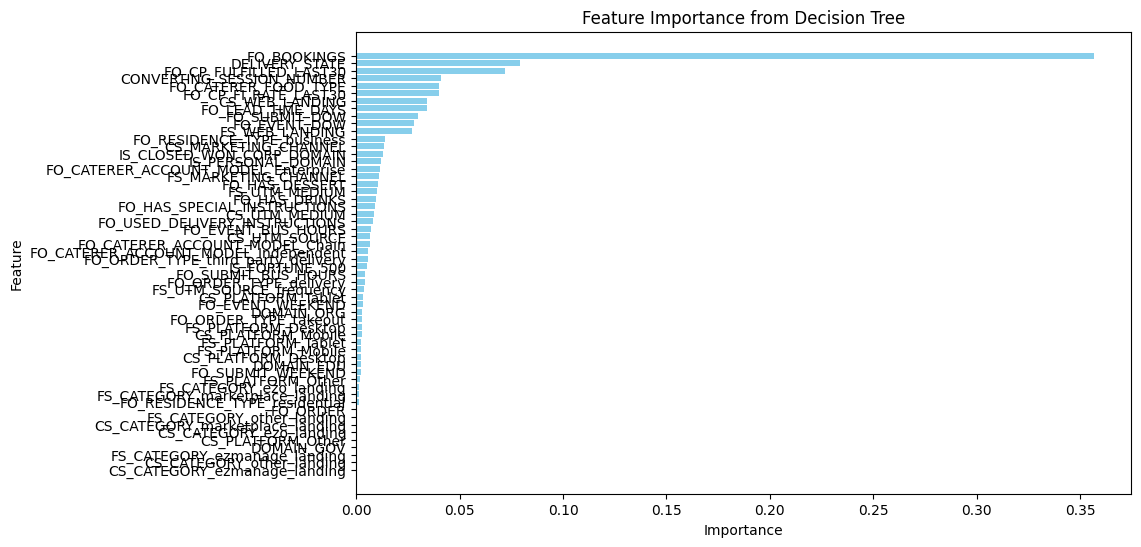

In [2715]:
# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from Decision Tree')
plt.gca().invert_yaxis()  # Invert y-axis to show the most important feature at the top
plt.show()


GridSearchCV

In [139]:
# from sklearn.model_selection import GridSearchCV

# rf = RandomForestRegressor()

# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [None, 10, 20],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }

# grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='r2')
# grid_search.fit(x_train, y_train)

# # Best parameters
# print("Best parameters found: ", grid_search.best_params_)

# # Evaluate model with best parameters
# best_model = grid_search.best_estimator_
# y_pred = best_model.predict(x_test)
# r2 = r2_score(y_test, y_pred)
# print("R^2 Score: ", r2)


Validation

In [101]:
val_df = pd.read_csv("Input\\test_new.csv")
val_df.head()

,USER_ID,FIRST_MARKETPLACE_ORDER_AT,AY1B,LIFETIME_MKTP_ORDERS,MKTP_ORDERS_365,CATEGORY,EMAIL_DOMAIN,DOMAIN_GOV,DOMAIN_EDU,DOMAIN_ORG,...,FS_MARKETING_CHANNEL,FS_CATEGORY,CONVERTING_VISIT,CONVERTING_SESSION_NUMBER,CS_PLATFORM,CS_WEB_LANDING,CS_UTM_MEDIUM,CS_UTM_SOURCE,CS_MARKETING_CHANNEL,CS_CATEGORY
0,1976784,2023-03-07 22:52:27.326,782.12,2,1,middle,cardinalgroup.com,False,False,False,...,Paid Search,marketplace_landing,2023-03-07T22:27:43.634Z,9,Desktop,Home,organic,google,Organic Search,marketplace_landing
1,2348751,2023-03-07 23:28:13.782,403.15,2,2,middle,gmail.com,False,False,False,...,Paid Search,marketplace_landing,2023-03-07T23:13:55.822Z,1,Desktop,Brand,cpc,google,Paid Search,marketplace_landing
2,2348768,2023-03-07 23:41:39.902,363.94,1,1,one and done,kp.org,False,False,True,...,Paid Search,marketplace_landing,2023-03-07T23:17:25.333Z,4,Desktop,Home,internal,direct,Internal Traffic,marketplace_landing
3,2348761,2023-03-07 23:35:53.639,398.46,1,1,one and done,alstomgroup.com,False,False,False,...,Paid Search,marketplace_landing,2023-03-07T23:27:27.505Z,4,Desktop,Search,internal,direct,Internal Traffic,marketplace_landing
4,2348625,2023-03-07 22:31:59.220,739.92,5,5,middle,gmail.com,False,False,False,...,Paid Search,marketplace_landing,2023-03-07T22:13:08.569Z,1,Desktop,Caterer,cpc,google,Paid Search,marketplace_landing


In [102]:
val_df.columns,val_df.shape

(Index(['USER_ID', 'FIRST_MARKETPLACE_ORDER_AT', 'AY1B', 'LIFETIME_MKTP_ORDERS',
        'MKTP_ORDERS_365', 'CATEGORY', 'EMAIL_DOMAIN', 'DOMAIN_GOV',
        'DOMAIN_EDU', 'DOMAIN_ORG', 'IS_PERSONAL_DOMAIN', 'IS_FORTUNE_500',
        'IS_CLOSED_WON_CORP_DOMAIN', 'FO_ORDER_ID', 'FO_BOOKINGS', 'FO_ORDER',
        'FO_CATERER_ID', 'FO_LEAD_TIME_DAYS', 'FO_SUBMIT_AT_LOCAL',
        'FO_SUBMIT_DOW', 'FO_SUBMIT_WEEKEND', 'FO_SUBMIT_BUS_HOURS',
        'FO_EVENT_AT_LOCAL', 'FO_EVENT_DOW', 'FO_EVENT_WEEKEND',
        'FO_EVENT_BUS_HOURS', 'FO_CATERER_ACCOUNT_MODEL',
        'FO_CATERER_FOOD_TYPE', 'FO_CP_FULFILLED_LAST30',
        'FO_CP_FI_RATE_LAST30', 'FO_ORDER_TYPE',
        'FO_USED_DELIVERY_INSTRUCTIONS', 'FO_RESIDENCE_TYPE', 'FO_ADDRESS_NAME',
        'DELIVERY_ZIP', 'DELIVERY_CITY', 'DELIVERY_STATE', 'FO_HAS_DRINKS',
        'FO_HAS_DESSERT', 'FO_HAS_SPECIAL_INSTRUCTIONS', 'FIRST_VISIT',
        'FS_PLATFORM', 'FS_WEB_LANDING', 'FS_UTM_MEDIUM', 'FS_UTM_SOURCE',
        'FS_MARKETING_CH

In [103]:
val_df.isna().sum()

USER_ID                             0
FIRST_MARKETPLACE_ORDER_AT          0
AY1B                                0
LIFETIME_MKTP_ORDERS                0
MKTP_ORDERS_365                     0
CATEGORY                            0
EMAIL_DOMAIN                        0
DOMAIN_GOV                          0
DOMAIN_EDU                          0
DOMAIN_ORG                          0
IS_PERSONAL_DOMAIN                  0
IS_FORTUNE_500                      0
IS_CLOSED_WON_CORP_DOMAIN           0
FO_ORDER_ID                         0
FO_BOOKINGS                         0
FO_ORDER                            0
FO_CATERER_ID                       0
FO_LEAD_TIME_DAYS                   0
FO_SUBMIT_AT_LOCAL                  0
FO_SUBMIT_DOW                       0
FO_SUBMIT_WEEKEND                   0
FO_SUBMIT_BUS_HOURS                 0
FO_EVENT_AT_LOCAL                   0
FO_EVENT_DOW                        0
FO_EVENT_WEEKEND                    0
FO_EVENT_BUS_HOURS                  0
FO_CATERER_A

In [104]:
def val_preprocess(df):
    cols_to_be_dropped = ["LIFETIME_MKTP_ORDERS","MKTP_ORDERS_365","CATEGORY"]
    df = df.drop(columns=cols_to_be_dropped)
    col_ids = ["FO_CATERER_ID", "FO_ORDER_ID", "USER_ID"]
    df = df.drop(columns = col_ids)
    df["FO_CP_FI_RATE_LAST30"].fillna(df["FO_CP_FI_RATE_LAST30"].mean(),inplace=True)

    bool_cols = list(val_df.select_dtypes(include=['boolean']).columns)
    for col in bool_cols:
        df[col]=df[col].apply(lambda x : 1 if x==True else 0)

    one_hot_encoding_cols =  ['FO_CATERER_ACCOUNT_MODEL', 'FO_ORDER_TYPE', 'FO_RESIDENCE_TYPE', 'FS_PLATFORM', 'FS_CATEGORY', 'CS_PLATFORM', 'CS_CATEGORY'] 
    Categorical_encoding_cols = ['FO_CATERER_FOOD_TYPE', 'DELIVERY_STATE', 'FS_WEB_LANDING', 'FS_UTM_MEDIUM', 'FS_MARKETING_CHANNEL', 'CS_WEB_LANDING', 'CS_UTM_MEDIUM', 'CS_MARKETING_CHANNEL']

    df = pd.get_dummies(df,columns=one_hot_encoding_cols)
    label_encoder = LabelEncoder()
    for col in categorical_encoding_cols:
        df[col]=label_encoder.fit_transform(df[col])

    frequency_map = df["CS_UTM_SOURCE"].value_counts(normalize=True)
    df["CS_UTM_SOURCE"] = df["CS_UTM_SOURCE"].map(frequency_map)

    temp=df["FS_UTM_SOURCE"].value_counts()
    data = temp.values


    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 80)

    new_map = {}

    for key,val in temp.items():
        if val<q1:
            new_map[key]="Low"
        elif val<q3:
            new_map[key]="Medium"
        else:
            new_map[key]="High"
    df["FS_UTM_SOURCE_frequency"] = df["FS_UTM_SOURCE"].map(new_map)

    df.drop(columns=['EMAIL_DOMAIN',
    'FO_ADDRESS_NAME',
    'DELIVERY_ZIP',
    'DELIVERY_CITY',
    'FS_UTM_SOURCE'],inplace=True)

    bool_cols = list(df.select_dtypes(include=['boolean']).columns)
    print(f'bool cols are {bool_cols}')
    for col in bool_cols:
        df[col]=df[col].apply(lambda x : 1 if x==True else 0)

    df["FS_UTM_SOURCE_frequency"]=label_encoder.fit_transform(df["FS_UTM_SOURCE_frequency"])

    return df

In [105]:
val_preprocessed_df = val_preprocess(val_df)
val_preprocessed_df.head()

bool cols are ['FO_CATERER_ACCOUNT_MODEL_Chain', 'FO_CATERER_ACCOUNT_MODEL_Enterprise', 'FO_CATERER_ACCOUNT_MODEL_Independent', 'FO_ORDER_TYPE_delivery', 'FO_ORDER_TYPE_takeout', 'FO_ORDER_TYPE_third_party_delivery', 'FO_RESIDENCE_TYPE_business', 'FO_RESIDENCE_TYPE_residential', 'FS_PLATFORM_Desktop', 'FS_PLATFORM_Mobile', 'FS_PLATFORM_Other', 'FS_PLATFORM_Tablet', 'FS_CATEGORY_ezmanage_landing', 'FS_CATEGORY_ezo_landing', 'FS_CATEGORY_marketplace_landing', 'FS_CATEGORY_other_landing', 'CS_PLATFORM_Desktop', 'CS_PLATFORM_Mobile', 'CS_PLATFORM_Other', 'CS_PLATFORM_Tablet', 'CS_CATEGORY_ezmanage_landing', 'CS_CATEGORY_ezo_landing', 'CS_CATEGORY_marketplace_landing']


,FIRST_MARKETPLACE_ORDER_AT,AY1B,DOMAIN_GOV,DOMAIN_EDU,DOMAIN_ORG,IS_PERSONAL_DOMAIN,IS_FORTUNE_500,IS_CLOSED_WON_CORP_DOMAIN,FO_BOOKINGS,FO_ORDER,...,FS_CATEGORY_marketplace_landing,FS_CATEGORY_other_landing,CS_PLATFORM_Desktop,CS_PLATFORM_Mobile,CS_PLATFORM_Other,CS_PLATFORM_Tablet,CS_CATEGORY_ezmanage_landing,CS_CATEGORY_ezo_landing,CS_CATEGORY_marketplace_landing,FS_UTM_SOURCE_frequency
0,2023-03-07 22:52:27.326,782.12,0,0,0,0,0,0,781.8450,0,...,1,0,1,0,0,0,0,0,1,0
1,2023-03-07 23:28:13.782,403.15,0,0,0,1,0,0,260.3685,0,...,1,0,1,0,0,0,0,0,1,0
2,2023-03-07 23:41:39.902,363.94,0,0,1,0,0,0,363.9400,0,...,1,0,1,0,0,0,0,0,1,0
3,2023-03-07 23:35:53.639,398.46,0,0,0,0,0,1,398.4625,0,...,1,0,1,0,0,0,0,0,1,0
4,2023-03-07 22:31:59.220,739.92,0,0,0,1,0,0,143.6900,1,...,1,0,1,0,0,0,0,0,1,0


In [106]:
val_preprocessed_df["FO_BOOKINGS"].describe()

count    21113.000000
mean       375.708868
std        333.790109
min       -160.160000
25%        194.600000
50%        291.860000
75%        445.450000
max       8043.400000
Name: FO_BOOKINGS, dtype: float64

In [107]:
skewed_cols = ["CONVERTING_SESSION_NUMBER", "FO_CP_FI_RATE_LAST30", "FO_CP_FULFILLED_LAST30", "FO_LEAD_TIME_DAYS"]

for col in skewed_cols:
    print(f'{col} = {val_preprocessed_df[col].min()}, {val_preprocessed_df[col].max()}')

CONVERTING_SESSION_NUMBER = 1, 369
FO_CP_FI_RATE_LAST30 = 0.0, 1.0
FO_CP_FULFILLED_LAST30 = 0, 383
FO_LEAD_TIME_DAYS = 0, 176


In [108]:
#assuming that const for FO_LEAD_TIME_DAYS is -20 and FO_BOOKINGS is -1000

val_preprocessed_df["FO_LEAD_TIME_DAYS"] = val_preprocessed_df["FO_LEAD_TIME_DAYS"]+20
# val_preprocessed_df["FO_BOOKINGS"] = val_preprocessed_df["FO_BOOKINGS"] + 1000
# val_preprocessed_df["AY1B"] = val_preprocessed_df["AY1B"] + 1000

In [109]:


# # Apply the helper function to the "FO_LEAD_TIME_DAYS" column
# val_preprocessed_df["FO_LEAD_TIME_DAYS"] = val_preprocessed_df["FO_LEAD_TIME_DAYS"].apply(helper)

# val_preprocessed_df["FO_BOOKINGS"] = val_preprocessed_df["FO_BOOKINGS"].apply(lambda x: 1 if x<=0 else x)



In [110]:
def yeojohnson(df):
    from sklearn.preprocessing import PowerTransformer


    pt = PowerTransformer(method='yeo-johnson')
    transformed_data = pt.fit_transform(df[['FO_BOOKINGS']])
    transformed_data_target = pt.fit_transform(df[['AY1B']])

    # Store transformed data in DataFrame
    df['FO_BOOKINGS'] = transformed_data
    df['AY1B'] = transformed_data_target
    return df

val_preprocessed_df = yeojohnson(val_preprocessed_df)

In [111]:
skewed_cols = ["CONVERTING_SESSION_NUMBER", "FO_CP_FI_RATE_LAST30", "FO_CP_FULFILLED_LAST30", "FO_LEAD_TIME_DAYS"]
for col in skewed_cols:
    val_preprocessed_df[col] = np.log1p(val_preprocessed_df[col])

In [112]:
val_preprocessed_df["FO_BOOKINGS"].describe()

count    2.111300e+04
mean    -1.150976e-16
std      1.000024e+00
min     -2.061168e+01
25%     -5.771709e-01
50%     -1.814317e-01
75%      3.602943e-01
max      1.302096e+01
Name: FO_BOOKINGS, dtype: float64

In [113]:
# x = ['AY1B',
#  'FO_BOOKINGS',
#  'FO_LEAD_TIME_DAYS',
#  'FO_SUBMIT_DOW',
#  'FO_EVENT_DOW',
#  'FO_CP_FULFILLED_LAST30',
#  'FO_CP_FI_RATE_LAST30',
#  'CONVERTING_SESSION_NUMBER']

# for i in x:
#     sns.displot(val_preprocessed_df[i], kde=True)
#     plt.xlabel(f'Variable')
#     plt.ylabel('Density')
#     plt.title(i)
#     plt.show()

In [114]:
val_preprocessed_df.dtypes

FIRST_MARKETPLACE_ORDER_AT          object
AY1B                               float64
DOMAIN_GOV                           int64
DOMAIN_EDU                           int64
DOMAIN_ORG                           int64
                                    ...   
CS_PLATFORM_Tablet                   int64
CS_CATEGORY_ezmanage_landing         int64
CS_CATEGORY_ezo_landing              int64
CS_CATEGORY_marketplace_landing      int64
FS_UTM_SOURCE_frequency              int32
Length: 61, dtype: object

In [115]:
datetime_columns = ['FIRST_MARKETPLACE_ORDER_AT','FO_EVENT_AT_LOCAL','CONVERTING_VISIT','FIRST_VISIT','FO_SUBMIT_AT_LOCAL']
temp_cols = [i for i in val_preprocessed_df if i not in datetime_columns]


In [116]:
validation_set = val_preprocessed_df[temp_cols]
min_max_based_columns = ['FO_SUBMIT_DOW', 'FO_EVENT_DOW', 'FO_CP_FULFILLED_LAST30', 'FO_CP_FI_RATE_LAST30']
standard_scale_columns = ['FO_BOOKINGS', 'FO_LEAD_TIME_DAYS', 'CONVERTING_SESSION_NUMBER']

# Fit and transform using MinMaxScaler
validation_set.loc[:, min_max_based_columns] = min_max_scalar.fit_transform(validation_set[min_max_based_columns])

# Fit and transform using StandardScaler
validation_set.loc[:, standard_scale_columns] = standard_scalar.fit_transform(validation_set[standard_scale_columns])

In [117]:
validation_set[min_max_based_columns+standard_scale_columns]

,FO_SUBMIT_DOW,FO_EVENT_DOW,FO_CP_FULFILLED_LAST30,FO_CP_FI_RATE_LAST30,FO_BOOKINGS,FO_LEAD_TIME_DAYS,CONVERTING_SESSION_NUMBER
0,0.333333,0.833333,0.270465,0.000000,1.358213,-0.074583,1.692316
1,0.333333,0.500000,0.301104,0.000000,-0.303745,-0.552749,-0.965948
2,0.333333,0.500000,0.184621,0.000000,0.082619,-0.552749,0.547464
3,0.333333,0.500000,0.184621,0.000000,0.202599,-0.552749,0.547464
4,0.333333,0.500000,0.116483,0.000000,-0.811546,-0.552749,-0.965948
...,...,...,...,...,...,...,...
21108,0.166667,0.666667,0.270465,0.000000,-0.413629,-0.074583,1.692316
21109,0.166667,0.500000,0.000000,0.103127,0.689698,-0.308467,0.178904
21110,0.166667,0.500000,0.327008,0.000000,2.059091,-0.308467,0.547464
21111,0.166667,0.333333,0.184621,0.000000,-0.507073,-0.552749,0.848599


In [118]:
validation_set.head()

,AY1B,DOMAIN_GOV,DOMAIN_EDU,DOMAIN_ORG,IS_PERSONAL_DOMAIN,IS_FORTUNE_500,IS_CLOSED_WON_CORP_DOMAIN,FO_BOOKINGS,FO_ORDER,FO_LEAD_TIME_DAYS,...,FS_CATEGORY_marketplace_landing,FS_CATEGORY_other_landing,CS_PLATFORM_Desktop,CS_PLATFORM_Mobile,CS_PLATFORM_Other,CS_PLATFORM_Tablet,CS_CATEGORY_ezmanage_landing,CS_CATEGORY_ezo_landing,CS_CATEGORY_marketplace_landing,FS_UTM_SOURCE_frequency
0,-0.079304,0,0,0,0,0,0,1.358213,0,-0.074583,...,1,0,1,0,0,0,0,0,1,0
1,-0.349485,0,0,0,1,0,0,-0.303745,0,-0.552749,...,1,0,1,0,0,0,0,0,1,0
2,-0.384478,0,0,1,0,0,0,0.082619,0,-0.552749,...,1,0,1,0,0,0,0,0,1,0
3,-0.353569,0,0,0,0,0,1,0.202599,0,-0.552749,...,1,0,1,0,0,0,0,0,1,0
4,-0.105131,0,0,0,1,0,0,-0.811546,1,-0.552749,...,1,0,1,0,0,0,0,0,1,0


In [119]:
def correlation(df):
    target="AY1B"
    corr_matrix = df.corr()
    # Extract correlation with the target variable
    target_corr = corr_matrix[target].drop(target)  # Exclude the target itself

    # Sort the correlations by increasing value
    sorted_target_corr = target_corr.sort_values()

    print(sorted_target_corr)
correlation(validation_set)

FO_ORDER                               -0.242500
IS_PERSONAL_DOMAIN                     -0.184271
FO_ORDER_TYPE_takeout                  -0.163740
FO_EVENT_WEEKEND                       -0.129011
FO_RESIDENCE_TYPE_residential          -0.110582
FS_MARKETING_CHANNEL                   -0.106760
CS_UTM_SOURCE                          -0.101040
CS_MARKETING_CHANNEL                   -0.100628
CS_PLATFORM_Mobile                     -0.099707
FS_PLATFORM_Mobile                     -0.091651
FO_EVENT_DOW                           -0.058903
FO_CATERER_ACCOUNT_MODEL_Enterprise    -0.051753
FO_SUBMIT_WEEKEND                      -0.039816
FO_SUBMIT_DOW                          -0.024738
FO_CATERER_FOOD_TYPE                   -0.021102
FS_CATEGORY_marketplace_landing        -0.018844
CS_PLATFORM_Other                      -0.014451
DELIVERY_STATE                         -0.013975
FO_CP_FI_RATE_LAST30                   -0.013708
CS_CATEGORY_ezo_landing                -0.006439
DOMAIN_GOV          

In [120]:
# Separating the target column
val_act_res = validation_set.loc[:, "AY1B"]

# Dropping the column using .loc to avoid SettingWithCopyWarning
validation_set = validation_set.drop(columns=["AY1B"])


In [121]:
# least_imp_cols = ['FS_CATEGORY_ezmanage_landing', 'CS_PLATFORM_Other', 'CS_CATEGORY_ezmanage_landing', 'CS_CATEGORY_other_landing']
# validation_set.drop(columns=least_imp_cols,inplace=True)

In [122]:
validation_set.isna().sum()

DOMAIN_GOV                              0
DOMAIN_EDU                              0
DOMAIN_ORG                              0
IS_PERSONAL_DOMAIN                      0
IS_FORTUNE_500                          0
IS_CLOSED_WON_CORP_DOMAIN               0
FO_BOOKINGS                             0
FO_ORDER                                0
FO_LEAD_TIME_DAYS                       0
FO_SUBMIT_DOW                           0
FO_SUBMIT_WEEKEND                       0
FO_SUBMIT_BUS_HOURS                     0
FO_EVENT_DOW                            0
FO_EVENT_WEEKEND                        0
FO_EVENT_BUS_HOURS                      0
FO_CATERER_FOOD_TYPE                    0
FO_CP_FULFILLED_LAST30                  0
FO_CP_FI_RATE_LAST30                    0
FO_USED_DELIVERY_INSTRUCTIONS           0
DELIVERY_STATE                          0
FO_HAS_DRINKS                           0
FO_HAS_DESSERT                          0
FO_HAS_SPECIAL_INSTRUCTIONS             0
FS_WEB_LANDING                    

In [123]:
validation_set[validation_set.duplicated()]

,DOMAIN_GOV,DOMAIN_EDU,DOMAIN_ORG,IS_PERSONAL_DOMAIN,IS_FORTUNE_500,IS_CLOSED_WON_CORP_DOMAIN,FO_BOOKINGS,FO_ORDER,FO_LEAD_TIME_DAYS,FO_SUBMIT_DOW,...,FS_CATEGORY_marketplace_landing,FS_CATEGORY_other_landing,CS_PLATFORM_Desktop,CS_PLATFORM_Mobile,CS_PLATFORM_Other,CS_PLATFORM_Tablet,CS_CATEGORY_ezmanage_landing,CS_CATEGORY_ezo_landing,CS_CATEGORY_marketplace_landing,FS_UTM_SOURCE_frequency


In [124]:
validation_set.head()


,DOMAIN_GOV,DOMAIN_EDU,DOMAIN_ORG,IS_PERSONAL_DOMAIN,IS_FORTUNE_500,IS_CLOSED_WON_CORP_DOMAIN,FO_BOOKINGS,FO_ORDER,FO_LEAD_TIME_DAYS,FO_SUBMIT_DOW,...,FS_CATEGORY_marketplace_landing,FS_CATEGORY_other_landing,CS_PLATFORM_Desktop,CS_PLATFORM_Mobile,CS_PLATFORM_Other,CS_PLATFORM_Tablet,CS_CATEGORY_ezmanage_landing,CS_CATEGORY_ezo_landing,CS_CATEGORY_marketplace_landing,FS_UTM_SOURCE_frequency
0,0,0,0,0,0,0,1.358213,0,-0.074583,0.333333,...,1,0,1,0,0,0,0,0,1,0
1,0,0,0,1,0,0,-0.303745,0,-0.552749,0.333333,...,1,0,1,0,0,0,0,0,1,0
2,0,0,1,0,0,0,0.082619,0,-0.552749,0.333333,...,1,0,1,0,0,0,0,0,1,0
3,0,0,0,0,0,1,0.202599,0,-0.552749,0.333333,...,1,0,1,0,0,0,0,0,1,0
4,0,0,0,1,0,0,-0.811546,1,-0.552749,0.333333,...,1,0,1,0,0,0,0,0,1,0


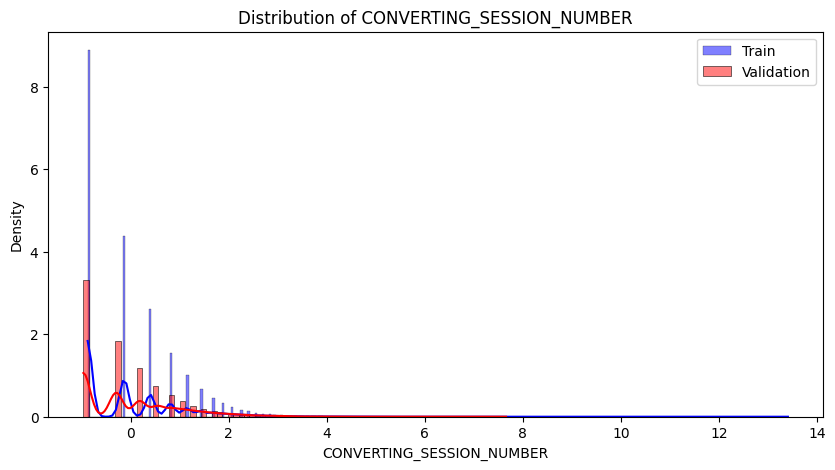

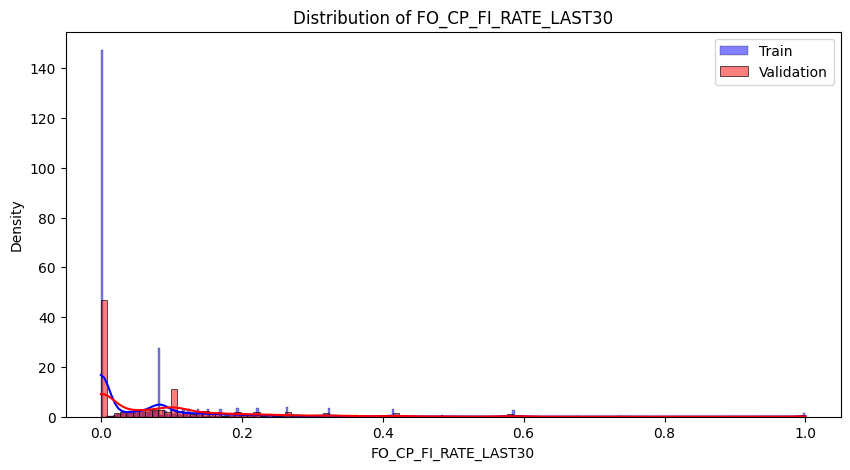

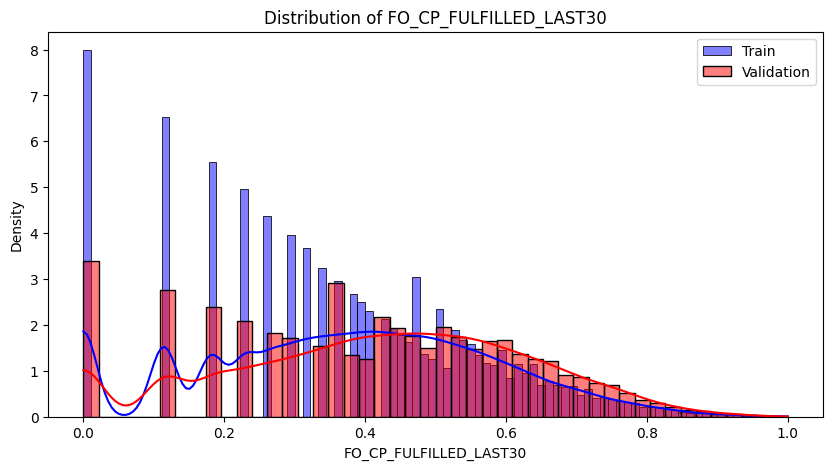

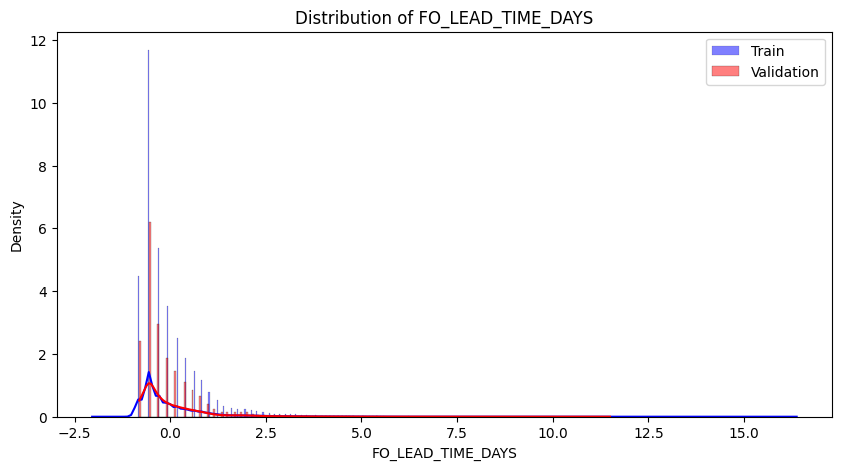

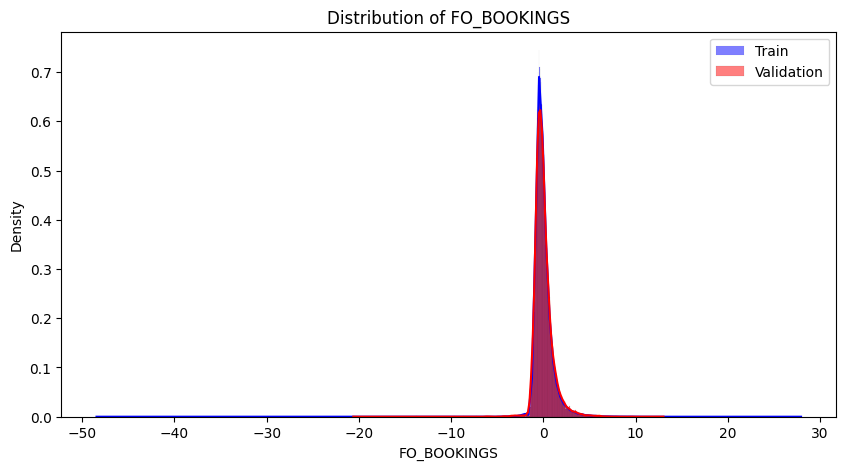

In [125]:
skewed_cols = ["CONVERTING_SESSION_NUMBER", "FO_CP_FI_RATE_LAST30", "FO_CP_FULFILLED_LAST30", "FO_LEAD_TIME_DAYS","FO_BOOKINGS"]

# Compare distributions for key features
for feature in skewed_cols:
    plt.figure(figsize=(10, 5))
    sns.histplot(x_train[feature], color='blue', label='Train', kde=True, stat='density')
    sns.histplot(validation_set[feature], color='red', label='Validation', kde=True, stat='density')
    plt.title(f'Distribution of {feature}')
    plt.legend()
    plt.show()


In [126]:
#  least_imp_features = ["CS_CATEGORY_other_landing","CS_PLATFORM_Other","FS_CATEGORY_ezmanage_landing","CS_CATEGORY_ezmanage_landing"]
#  temp_df = [i for i in validation_set.columns if i not in least_imp_features]

In [127]:
validation_set["FO_BOOKINGS"].describe(),val_preprocessed_df["FO_BOOKINGS"].describe()

(count    2.111300e+04
 mean     4.038513e-18
 std      1.000024e+00
 min     -2.061168e+01
 25%     -5.771709e-01
 50%     -1.814317e-01
 75%      3.602943e-01
 max      1.302096e+01
 Name: FO_BOOKINGS, dtype: float64,
 count    2.111300e+04
 mean    -1.150976e-16
 std      1.000024e+00
 min     -2.061168e+01
 25%     -5.771709e-01
 50%     -1.814317e-01
 75%      3.602943e-01
 max      1.302096e+01
 Name: FO_BOOKINGS, dtype: float64)

In [128]:
# for i in x_:
#     if i not in validation_set.columns:
#         print(i)

In [129]:
validation_set.head()

,DOMAIN_GOV,DOMAIN_EDU,DOMAIN_ORG,IS_PERSONAL_DOMAIN,IS_FORTUNE_500,IS_CLOSED_WON_CORP_DOMAIN,FO_BOOKINGS,FO_ORDER,FO_LEAD_TIME_DAYS,FO_SUBMIT_DOW,...,FS_CATEGORY_marketplace_landing,FS_CATEGORY_other_landing,CS_PLATFORM_Desktop,CS_PLATFORM_Mobile,CS_PLATFORM_Other,CS_PLATFORM_Tablet,CS_CATEGORY_ezmanage_landing,CS_CATEGORY_ezo_landing,CS_CATEGORY_marketplace_landing,FS_UTM_SOURCE_frequency
0,0,0,0,0,0,0,1.358213,0,-0.074583,0.333333,...,1,0,1,0,0,0,0,0,1,0
1,0,0,0,1,0,0,-0.303745,0,-0.552749,0.333333,...,1,0,1,0,0,0,0,0,1,0
2,0,0,1,0,0,0,0.082619,0,-0.552749,0.333333,...,1,0,1,0,0,0,0,0,1,0
3,0,0,0,0,0,1,0.202599,0,-0.552749,0.333333,...,1,0,1,0,0,0,0,0,1,0
4,0,0,0,1,0,0,-0.811546,1,-0.552749,0.333333,...,1,0,1,0,0,0,0,0,1,0


In [130]:
val_pred_res = mod.predict(validation_set)
tempppp = list(zip(list(val_act_res),list(val_pred_res)))
# val_pred_res = np.expm1(val_pred_res)

In [131]:
val_pred_res

array([ 0.88628095, -0.30921637,  0.25397147, ...,  0.77189732,
        0.10760034,  0.83896579])

In [132]:
val_act_res

0       -0.079304
1       -0.349485
2       -0.384478
3       -0.353569
4       -0.105131
           ...   
21108   -0.349644
21109   -0.233371
21110    0.410202
21111   -0.546205
21112    3.079136
Name: AY1B, Length: 21113, dtype: float64

In [133]:
print(f"r2 score={r2_score(val_act_res,val_pred_res)}")
print(f"mse={mean_squared_error(val_act_res,val_pred_res)}")
print(f"mae={mean_absolute_error(val_act_res,val_pred_res)}")
print(f"rmse={mean_squared_error(val_act_res,val_pred_res,squared=False)}")

r2 score=0.2397813597916736
mse=0.7602186402083263
mae=0.5343635108405216
rmse=0.8719051784502294


c:\Users\Ajay.N.lv\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [134]:
inverse_transformed_target = pt.inverse_transform(val_act_res.values.reshape(-1,1))
inverse_transformed_predicted = pt.inverse_transform(val_pred_res.reshape(-1,1))
print(f"rmse={mean_squared_error(inverse_transformed_target,inverse_transformed_predicted,squared=False)}")  #Validation scores

rmse=3754.270608275061


c:\Users\Ajay.N.lv\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
c:\Users\Ajay.N.lv\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
c:\Users\Ajay.N.lv\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [135]:
inverse_transformed_target,inverse_transformed_predicted

(array([[  629.85749362],
        [  276.46544598],
        [  240.22570381],
        ...,
        [ 1578.46738865],
        [  103.00868538],
        [12712.07170845]]),
 array([[2852.78266561],
        [ 320.94958538],
        [1234.47020226],
        ...,
        [2516.28409052],
        [ 946.83234319],
        [2711.30405968]]))

In [136]:
list(zip(list(val_act_res),list(val_pred_res)))

[(-0.07930408564265785, 0.8862809479964939),
 (-0.34948523053868813, -0.30921637331194085),
 (-0.3844776942951505, 0.25397146918255453),
 (-0.3535691975368232, 0.3723194610063787),
 (-0.10513112916197061, -0.4213975735740427),
 (0.19407972720064592, 0.7793961809581126),
 (-0.553145255417967, -0.21905556246017382),
 (-0.5405014363603311, -0.3452215052351032),
 (0.11062884758952475, -0.1951884004807046),
 (-0.5643958488533456, 0.1634991137917215),
 (-0.2143466817524244, 0.12913296198710394),
 (-0.5156858841462668, -0.2417385164115268),
 (-0.4321965291534903, 0.04152799584729425),
 (-0.4999607137433089, -0.31235595223879303),
 (-0.13553977133744913, 0.010120637430527579),
 (-0.5519772283010581, -0.23387285293241103),
 (0.7719570182460957, 0.002458428784452186),
 (-0.04981130813093865, 0.2527956568108559),
 (0.3345231813223176, 0.024388600287858598),
 (-0.3703276995987163, -0.2502730126396962),
 (-0.5991957790821033, 0.01667339827982448),
 (1.639319104024769, -0.3441934491834779),
 (0.0836

In [137]:
list(zip(list(inverse_transformed_target ),list(inverse_transformed_predicted)))

[(array([629.85749362]), array([2852.78266561])),
 (array([276.46544598]), array([320.94958538])),
 (array([240.22570381]), array([1234.47020226])),
 (array([272.1194199]), array([1491.60230549])),
 (array([590.61581915]), array([204.46436161])),
 (array([1112.66995438]), array([2537.76609634])),
 (array([98.27579921]), array([431.10897151])),
 (array([106.97144549]), array([281.03543126])),
 (array([952.43776219]), array([462.67035214])),
 (array([90.81360523]), array([1052.6640408])),
 (array([437.2571519]), array([987.0069745])),
 (array([124.97918068]), array([402.03779656])),
 (array([194.49065438]), array([828.2314521])),
 (array([137.02824846]), array([317.37546542])),
 (array([545.86106924]), array([774.34834625])),
 (array([99.06541239]), array([412.01623212])),
 (array([2516.45478669]), array([761.44865157])),
 (array([676.04016305]), array([1232.02476066])),
 (array([1407.12811203]), array([798.6263436])),
 (array([254.60725297]), array([391.33432648])),
 (array([69.39741336

In [138]:
max(list(val_pred_res)),max(list(val_act_res))

(3.840373021499521, 14.122042908669416)